<a href="https://colab.research.google.com/github/Krossbelling/income_dependence/blob/main/income_dependence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Зависимость дохода человека от различных факторов

# Описание набора данных и признаков



[Данные](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset?resource=download) представляют собой информацию об годовом доходе человека в зависимости от различных факторов. 

Описание признаков.

1. age - возраст
2. workclass - рабочий класс
3. fnlwgt (final weight) – примерная оценка количества людей
4. education - образование
5. educational-num - длительность обучения
6. marital-status - семейное положение
7. occupation - занятость
8. relationship - отношения
9. race - раса
10. gender - пол


# Первичный анализ признаков

Считаем данные.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("../content/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Первичный визуальный анализ признаков

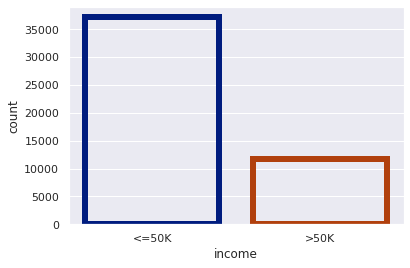

In [ ]:
sns.set_theme()
l=sns.countplot(data=df, x='income', edgecolor=sns.color_palette("dark", 2),  linewidth=6,
             facecolor=(0, 0, 0, 0))

In [ ]:
print('Процент людей, зарабатывающих >  50K:',round((((df['income']=='>50K').value_counts()[1])/df.shape[0])*100,1),'%')
print('Процент людей, зарабатывающих <= 50K:',round((((df['income']=='<=50K').value_counts()[1])/df.shape[0])*100,1),'%')

Процент людей, зарабатывающих >  50K: 23.9 %
Процент людей, зарабатывающих <= 50K: 76.1 %


# Закономерности, "инсайты", особенности данных

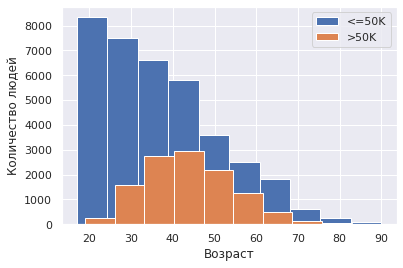

среднее отклонение возраста для лиц зарабатывающих более 50К: 44.28 %
среднее отклонение возраста для лиц зарабатывающих менее 50К: 36.87 %
среднеквадратичное (стандартное) отклонение возраста для лиц зарабатывающих более 50К: 10.56 %
среднеквадратичное (стандартное) отклонение возраста для лиц зарабатывающих менее 50К: 14.1 %


In [ ]:
df.groupby('income')['age'].hist()
plt.ylabel('Count',text='Количество людей')
plt.xlabel('Age',text='Возраст')
plt.legend(np.array(["<=50K", ">50K"]))
plt.show()

print('среднее отклонение возраста для лиц зарабатывающих более 50К:', round(df[df["income"] ==">50K"]["age"].mean(),2),'%') 
print('среднее отклонение возраста для лиц зарабатывающих менее 50К:', round(df[df["income"] =="<=50K"]["age"].mean(),2),'%')
print('среднеквадратичное (стандартное) отклонение возраста для лиц зарабатывающих более 50К:', round(df[df["income"] ==">50K"]["age"].std(),2),'%')  
print('среднеквадратичное (стандартное) отклонение возраста для лиц зарабатывающих менее 50К:', round(df[df["income"] =="<=50K"]["age"].std(),2),'%')

# Выбор метрики

В качестве основной метрики для оценки качества модели будет выбран критерий ROC-AUC. Данная задача имеет высокую несбалансированность целевого класса, в свою очередь, метрика ROC AUC зависят от предсказанных вероятностей классов

# Выбор модели

В качестве моделей выберем:

*   kNeighborsClassifier;
*   DecisionTreeClassifier.

kNeighborsClassifier(kNN) - это непараметрический, основанный на экземпляре алгоритм, используемый в контролируемой настройке

DecisionTreeClassifier(Дерево решений) - это тип алгоритма контролируемого обучения (с заранее определенной целевой переменной), который в основном используется в задачах классификации. Он работает как для категориальных, так и для непрерывных входных и выходных переменных. В этом методе мы разделяем совокупность или выборку на два или более однородных набора (или подгруппы) на основе наиболее значимого разделителя / дифференциатора во входных переменных.


# Предобработка данных

In [ ]:
attrib, counts = np.unique(df['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['workclass'][df['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['occupation'][df['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['native-country'][df['native-country'] == '?'] = most_freq_attrib 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added b

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
df['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
df['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

df['education'].value_counts()

HS-grad              20398
Some-college         10878
Bachelors             8025
Masters               2657
Assoc-voc             2061
elementary_school     1711
Assoc-acdm            1601
Prof-school            834
Doctorate              594
Preschool               83
Name: education, dtype: int64

In [ ]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

df['marital-status'].replace(to_replace = married ,value = 'Married',inplace = True)
df['marital-status'].replace(to_replace = separated,value = 'Separated',inplace = True)

df['marital-status'].value_counts()


Married          23044
Never-married    16117
Separated         8163
Widowed           1518
Name: marital-status, dtype: int64

In [ ]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']


df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

df['workclass'].value_counts()

Private           36705
Govt_employees     6549
Self_employed      5557
Without-pay          21
Never-worked         10
Name: workclass, dtype: int64

In [ ]:
del_cols = ['relationship','educational-num']
df.drop(labels = del_cols,axis = 1,inplace = True)
index_age = df[df['age'] == 90].index
df.drop(labels = index_age,axis = 0,inplace =True)
index_gain = df[df['capital-gain'] == 99999].index
df.drop(labels = index_gain,axis = 0,inplace =True)

In [ ]:
num_col_new = ['age','capital-gain', 'capital-loss',
       'hours-per-week','fnlwgt']
cat_col_new = ['workclass', 'education', 'marital-status', 'occupation',
               'race', 'gender', 'income']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(df[num_col_new]),columns = num_col_new).head(5)

,age,capital-gain,capital-loss,hours-per-week,fnlwgt
0,0.111111,0.000000,0.0,0.397959,0.145129
1,0.291667,0.000000,0.0,0.500000,0.052451
2,0.152778,0.000000,0.0,0.397959,0.219649
3,0.375000,0.186105,0.0,0.397959,0.100153
4,0.013889,0.000000,0.0,0.295918,0.061708


In [ ]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_new 
        return df
        
    
    
pipeline = Pipeline([('selector',DataFrameSelector(num_col_new)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])

In [ ]:
num_df = pipeline.fit_transform(df)
num_df.shape

(48543, 5)

In [ ]:
cols = ['workclass_Govt_employess','education_Some-college',
        'marital-status_Never-married','occupation_Other-service',
        'race_Black','gender_Male','income_>50K']

In [ ]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 

        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_new)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(df)
cat_df.shape

(48543, 36)

In [ ]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))

In [ ]:
final_df = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Количество наблюдений в окончательном наборе данных: {final_df.shape}")

Количество наблюдений в окончательном наборе данных: (48247, 42)


# Кросс-валидация, подбор параметров

In [ ]:
y = final_df['income_<=50K']
final_df.drop(labels = ['id','income_<=50K','fnlwgt'],axis = 1,inplace = True)
X = final_df

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
X_rus = pd.DataFrame(X_rus)
X_rus.columns = ['education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_elementary_school', 'gender_Female',
       'marital-status_Married', 'marital-status_Separated',
       'marital-status_Widowed', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Other',
       'race_White', 'workclass_Govt_employees', 'workclass_Never-worked',
       'workclass_Private', 'workclass_Self_employed', 'workclass_Without-pay',
       'age', 'capital-gain', 'capital-loss', 'hours-per-week']
y_rus = pd.DataFrame(y_rus)
y_rus.columns = ["income"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_rus,y_rus,test_size =0.25,random_state = 42)

In [ ]:
X_train.shape

(17050, 39)

# Построение кривых валидации и обучения

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn import metrics
from datetime import datetime
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.under_sampling import RandomUnderSampler
def GetBasedModel():
    basedModels = []    
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))   

    
    return basedModels

In [ ]:
def BasedLine2(X_train, y_train,models):    
    num_folds = 3
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names,results

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
class PlotBoxR(object):      
    def __Trace(self,nameOfFeature,value):     
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):        
        data = []
        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))
        py.iplot(data)

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNN: 0.758006 (0.003001)
CART: 0.712786 (0.003371)


In [ ]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame
basedLineScore = ScoreDataFrame(names,results)
basedLineScore.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,0.7580
1,CART,0.7128


In [ ]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):        
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1
                                 )        
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def Best_Model_Predict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

In [ ]:
from scipy.stats import uniform

class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):        
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1
                                 )        
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def Best_Model_Predict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
rfe = RFE(lr)
lr3 = rfe.fit(X_train, y_train)
feature = list(X_train.columns.values) 
print(sorted(zip(map(lambda x: round(x, 4), lr3.ranking_), feature)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logi

[(1, 'education_Bachelors'), (1, 'education_Doctorate'), (1, 'education_Masters'), (1, 'education_Preschool'), (1, 'education_Prof-school'), (1, 'education_elementary_school'), (1, 'marital-status_Married'), (1, 'marital-status_Separated'), (1, 'marital-status_Widowed'), (1, 'occupation_Armed-Forces'), (1, 'occupation_Exec-managerial'), (1, 'occupation_Priv-house-serv'), (1, 'occupation_Prof-specialty'), (1, 'occupation_Protective-serv'), (1, 'occupation_Sales'), (1, 'occupation_Tech-support'), (1, 'race_Amer-Indian-Eskimo'), (1, 'race_Other'), (1, 'workclass_Without-pay'), (2, 'occupation_Craft-repair'), (3, 'occupation_Transport-moving'), (4, 'occupation_Adm-clerical'), (5, 'occupation_Machine-op-inspct'), (6, 'education_HS-grad'), (7, 'gender_Female'), (8, 'capital-loss'), (9, 'capital-gain'), (10, 'education_Assoc-acdm'), (11, 'education_Assoc-voc'), (12, 'race_White'), (13, 'hours-per-week'), (14, 'workclass_Govt_employees'), (15, 'occupation_Farming-fishing'), (16, 'workclass_Sel

In [ ]:
X_train_f = X_train[['education_Bachelors','education_Doctorate','education_Masters','education_Preschool',
                     'education_Prof-school','education_elementary_school','marital-status_Married',
                     'marital-status_Separated','marital-status_Widowed','occupation_Exec-managerial',
                     'occupation_Prof-specialty','occupation_Protective-serv','occupation_Sales','occupation_Tech-support']]

X_test_f = X_test[['education_Bachelors','education_Doctorate','education_Masters','education_Preschool',
                     'education_Prof-school','education_elementary_school','marital-status_Married',
                     'marital-status_Separated','marital-status_Widowed','occupation_Exec-managerial',
                  'occupation_Prof-specialty','occupation_Protective-serv','occupation_Sales','occupation_Tech-support']]

lr4=LogisticRegression(C=0.4, random_state=4 ,penalty='l2', class_weight={0:1,1:1})
lr4.fit(X_train_f,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=0.4, class_weight={0: 1, 1: 1}, random_state=4)

Метод kNeighborsClassifier(kNN).

In [ ]:
k_range = list(range(2,15))
d_metric = ['euclidean','minkowski']

param_grid = dict(n_neighbors = k_range, metric =d_metric)

knn = KNeighborsClassifier()

KNN_GridSearch = GridSearch(X_train_f, y_train, knn ,param_grid)
y_pred = KNN_GridSearch.Best_Model_Predict(X_test_f)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Best: 0.767625 using {'metric': 'euclidean', 'n_neighbors': 14}


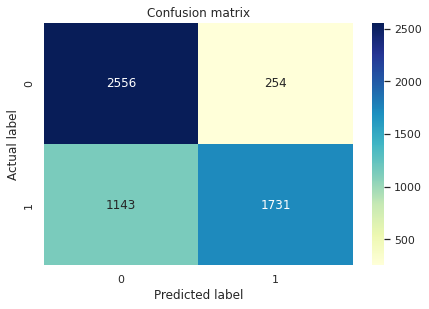

Accuracy: 0.754222378606615
Precision: 0.8720403022670025
Recall: 0.6022964509394572
F1 score: 0.712492282362626


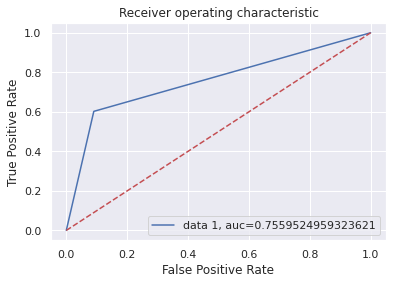

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

Метода DecisionTreeClassifier(Дерево решений)

In [ ]:
from scipy.stats import randint
max_depth_value = [4, 5,6,7,8,9,10,11,12,13]
max_features_value =  randint(1, 7)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

CART = DecisionTreeClassifier(random_state=1)

CART_RandSearch = RandomSearch(X_train_f, y_train, CART, param_grid)
Prediction_CART = CART_RandSearch.Best_Model_Predict(X_test_f)

Best: 0.779765 using {'criterion': 'entropy', 'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 3}


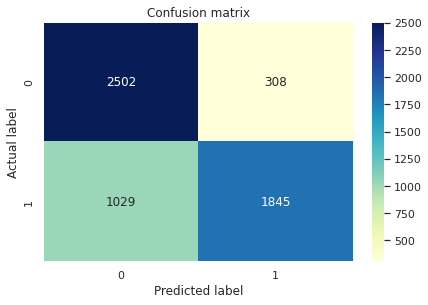

Accuracy: 0.7647783251231527
Precision: 0.8569437993497445
Recall: 0.6419624217118998
F1 score: 0.734036204495723


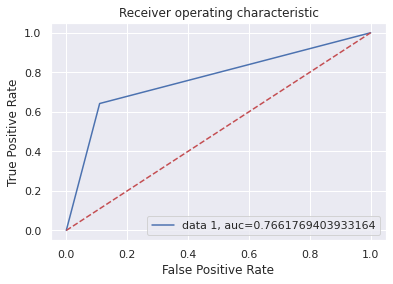

In [ ]:
cf_matrix = confusion_matrix(y_test, Prediction_CART)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, Prediction_CART))
print("Precision:",metrics.precision_score(y_test, Prediction_CART))
print("Recall:",metrics.recall_score(y_test, Prediction_CART))
print("F1 score:",metrics.f1_score(y_test, Prediction_CART))

fpr, tpr, _ = metrics.roc_curve(y_test,  Prediction_CART)
auc = metrics.roc_auc_score(y_test, Prediction_CART)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

# Выводы

В результате исследования, были построены две модели kNeighborsClassifier(kNN) и DecisionTreeClassifier(Дерево решений). Полученное качество модели, оцененное с помощью метрики ROC-AUС. На тестовой выборке kNeighborsClassifier(0.7559524) показал результат чуть хуже, чем DecisionTreeClassifier(0.7661769). 